# Time Series Forecasting with Machine Learning Model ARIMA

By Alina Tabish 

_“The goal of forecasting is not to predict the future but to tell you what you need to know to take meaningful action in the present.”_

__— Paul Saffo__

Time series forecasting is a data science task that is critical to a variety of activities within any business organisation. Time series forecasting is a useful tool that can help to understand how historical data influences the future. This is done by looking at past data, defining the patterns, and producing short or long-term predictions.

The aim of this project was get familiar with timeseries and forecasting ML models and predict the future values  

The dataset was download from Kaggle: [Forecasts for Product Demand](https://www.kaggle.com/datasets/felixzhao/productdemandforecasting)

The dataset contains _historical product demand for a manufacturing company with footprints globally_. The company provides thousands of products within dozens of product categories. There are four central warehouses to ship products within the region it is responsible for. Since the products are manufactured in different locations all over the world, it normally takes more than one month to ship products via ocean to different central warehouses. If forecasts for each product in different central with reasonable accuracy for the monthly demand for month after next can be achieved, it would be beneficial to the company in multiple ways.


# Importing and Prepping the Data

#### Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style 


In [2]:
style.use('seaborn-whitegrid') #sets the size of the charts
style.use('seaborn')

#### Importing the data

In [41]:
# reading the csv into the pandas dataframe

df = pd.read_csv("Historical_Product_Demand.csv")    


In [42]:
df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,27-07-12,100
1,Product_0979,Whse_J,Category_028,19-01-12,500
2,Product_0979,Whse_J,Category_028,03-02-12,500
3,Product_0979,Whse_J,Category_028,09-02-12,500
4,Product_0979,Whse_J,Category_028,02-03-12,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,27-04-16,1000
1048571,Product_1974,Whse_J,Category_006,27-04-16,1
1048572,Product_1787,Whse_J,Category_006,28-04-16,2500
1048573,Product_0901,Whse_J,Category_023,07-10-16,50


In [44]:
#making a copy of the dataframe
df_copy=df

In [45]:
#changing the type of date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

In [47]:
g=df.groupby('Warehouse')
g.first()

,Product_Code,Product_Category,Date,Order_Demand
Warehouse,,,,
Whse_A,Product_0905,Category_023,2012-07-03,50
Whse_C,Product_1581,Category_005,2012-10-01,2000
Whse_J,Product_0993,Category_028,2012-07-27,100
Whse_S,Product_1994,Category_019,2012-11-23,3000


#### Checking for null values

In [48]:
df.isnull().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

null values found in date


In [49]:
#dropping null values 
df.dropna(inplace=True)

In [50]:
df.isnull().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

# Exploring the Data

In [14]:
df.shape

(1037336, 5)

In [15]:
df.sample(5)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
312643,Product_1453,Whse_J,Category_019,2013-12-24,10000
929535,Product_2027,Whse_J,Category_005,2016-12-13,1000
335730,Product_0946,Whse_A,Category_018,2013-10-26,0
463238,Product_1427,Whse_J,Category_019,2014-08-22,1000
422648,Product_2001,Whse_J,Category_005,2014-06-17,100


In [16]:
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                 int64
dtype: object

In [17]:
df.head(10)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-03-02,500
3,Product_0979,Whse_J,Category_028,2012-09-02,500
4,Product_0979,Whse_J,Category_028,2012-02-03,500
5,Product_0979,Whse_J,Category_028,2012-04-19,500
6,Product_0979,Whse_J,Category_028,2012-05-06,500
7,Product_0979,Whse_J,Category_028,2012-06-27,500
8,Product_0979,Whse_J,Category_028,2012-07-23,500
9,Product_0979,Whse_J,Category_028,2012-08-29,500


### Five point summary

The five number summary gives you a rough idea about what your data set looks like. It consists of the five most important sample percentiles

In [57]:
pd.options.display.float_format = "{:.2f}".format

In [58]:
df.describe()



,Order_Demand
count,829433.00
mean,6152.40
std,32402.49
min,-999000.00
25%,100.00
50%,900.00
75%,3000.00
max,4000000.00


In [59]:
#checking the sum of all total orders
df['Order_Demand'].sum()

5103003111

### Checking the frequency of the demand orders

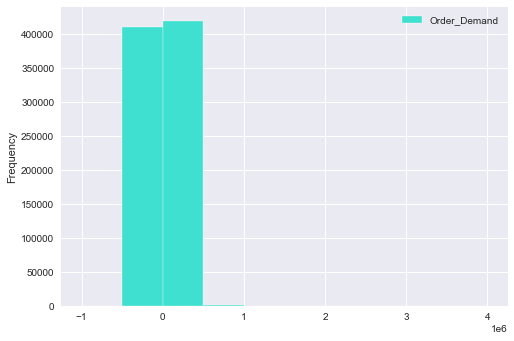

In [60]:
Total_orders = df['Order_Demand']
plt.hist(Total_orders,color="turquoise", label='Order_Demand')
plt.legend()
plt.ylabel('Frequency')
plt.show()

### How many demand of Orders were made by each warehouse?


In [61]:
total_per_warehouse=df.groupby(by=['Warehouse'], as_index=False)['Order_Demand'].sum().head()
total_per_warehouse

,Warehouse,Order_Demand
0,Whse_A,143128061
1,Whse_C,581824381
2,Whse_J,3343890143
3,Whse_S,1034160526


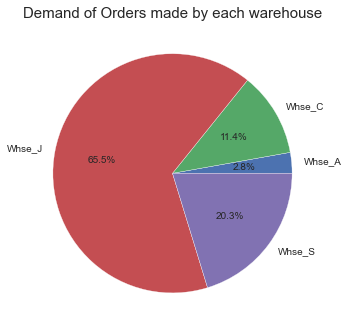

In [66]:
#using pie chart to show the sum of orders


plt.pie(total_per_warehouse['Order_Demand'], labels=['Whse_A','Whse_C','Whse_J','Whse_S'],autopct='%1.1f%%')
plt.title("Demand of Orders made by each warehouse",fontsize=15);
plt.show()

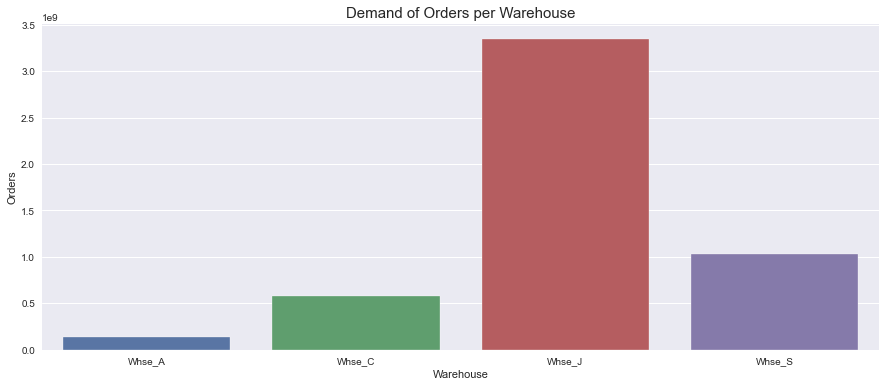

In [65]:
#using bar chart to visulaize the difference of orders between each warehouse

y=df.groupby("Warehouse")['Order_Demand'].sum()
x = y.index #the index(row labels) of the dataframe


plt.figure(figsize=(15,6)) # setting the plot figure size
ax = sns.barplot(x= x, y = y) # using the seaborn's barplot method
ax.set(xlabel = 'Warehouse') 
ax.set(ylabel = 'Orders') 
ax.set_title('Demand of Orders per Warehouse', fontsize=15)
plt.show() # displaying the plot


Most of the orders were demanded from warehouse J, then Whse_S, then Whse_C and lastly Whse_A

### Checking the top 5 most number of orders 

In [68]:
print('The TOP 5 Most Number Of Demand Orders ')
df.sort_values(by='Order_Demand', ascending=False).head()

The TOP 5 Most Number Of Demand Orders 


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
20892,Product_1432,Whse_S,Category_019,2012-11-06,4000000
20477,Product_1248,Whse_J,Category_019,2012-05-07,3000000
222266,Product_1432,Whse_S,Category_019,2013-06-14,3000000
72638,Product_1341,Whse_C,Category_019,2012-06-02,3000000
258396,Product_1248,Whse_J,Category_019,2013-11-11,2560000


This shows that the highest number of orders were made from warhouse Whse_S


#### Inserting new columns named month and day for further analysis

In [69]:
# to insert month
df.insert(loc=3, column='month', value=df['Date'].dt.month)

# to insert day
df.insert(loc=4, column='day', value=(df['Date'].dt.dayofweek)+1)

In [70]:
#splitting rows cointaing warehouse Whse_A
dfA = df[df['Warehouse'].str.contains('Whse_A')]
dfA

,Product_Code,Warehouse,Product_Category,month,day,Date,Order_Demand
34593,Product_0905,Whse_A,Category_023,7,2,2012-07-03,50
41029,Product_0097,Whse_A,Category_019,1,3,2012-01-18,6000
41030,Product_1496,Whse_A,Category_019,3,2,2012-03-13,5000
41031,Product_0097,Whse_A,Category_019,4,1,2012-04-16,6000
41032,Product_0097,Whse_A,Category_019,9,1,2012-09-24,3900
...,...,...,...,...,...,...,...
995785,Product_1427,Whse_A,Category_019,11,2,2016-11-29,0
995786,Product_1427,Whse_A,Category_019,6,7,2016-06-12,200
995787,Product_1427,Whse_A,Category_019,7,2,2016-07-12,0
995798,Product_1470,Whse_A,Category_019,5,4,2016-05-19,100


In [71]:
#splitting rows cointaing warehouse Whse_C
dfC = df[df['Warehouse'].str.contains('Whse_C')]
dfC

,Product_Code,Warehouse,Product_Category,month,day,Date,Order_Demand
313,Product_1581,Whse_C,Category_005,10,1,2012-10-01,2000
314,Product_1581,Whse_C,Category_005,9,7,2012-09-02,2000
315,Product_1581,Whse_C,Category_005,2,1,2012-02-13,5000
316,Product_2015,Whse_C,Category_005,2,5,2012-02-24,2000
317,Product_1581,Whse_C,Category_005,2,3,2012-02-29,5000
...,...,...,...,...,...,...,...
997215,Product_1341,Whse_C,Category_019,10,5,2016-10-28,0
997216,Product_1341,Whse_C,Category_019,12,4,2016-12-29,0
997217,Product_1263,Whse_C,Category_019,12,4,2016-12-29,0
997218,Product_1341,Whse_C,Category_019,12,4,2016-12-29,0


In [72]:
#splitting rows cointaing warehouse Whse_J
dfJ = df[df['Warehouse'].str.contains('Whse_J')]
dfJ

,Product_Code,Warehouse,Product_Category,month,day,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,7,5,2012-07-27,100
1,Product_0979,Whse_J,Category_028,1,4,2012-01-19,500
2,Product_0979,Whse_J,Category_028,3,5,2012-03-02,500
3,Product_0979,Whse_J,Category_028,9,7,2012-09-02,500
4,Product_0979,Whse_J,Category_028,2,5,2012-02-03,500
...,...,...,...,...,...,...,...
1048562,Product_0287,Whse_J,Category_021,12,6,2016-12-10,90
1048564,Product_0287,Whse_J,Category_021,11,5,2016-11-11,30
1048570,Product_1791,Whse_J,Category_006,4,3,2016-04-27,1000
1048572,Product_1787,Whse_J,Category_006,4,4,2016-04-28,2500


In [73]:
#splitting rows cointaing warehouse Whse_S
dfS = df[df['Warehouse'].str.contains('Whse_S')]
dfS

,Product_Code,Warehouse,Product_Category,month,day,Date,Order_Demand
215,Product_1994,Whse_S,Category_019,11,5,2012-11-23,3000
216,Product_0558,Whse_S,Category_030,8,1,2012-08-20,5000
217,Product_0560,Whse_S,Category_030,8,1,2012-08-20,15000
218,Product_0561,Whse_S,Category_030,8,5,2012-08-10,2000
219,Product_1994,Whse_S,Category_019,1,1,2012-01-16,100
...,...,...,...,...,...,...,...
1000064,Product_0586,Whse_S,Category_032,4,5,2016-04-22,18
1000065,Product_0586,Whse_S,Category_032,5,5,2016-05-20,18
1000067,Product_0586,Whse_S,Category_032,10,4,2016-10-06,36
1000068,Product_0586,Whse_S,Category_032,1,4,2016-01-07,36


### How many number of Orders were demanded per month?


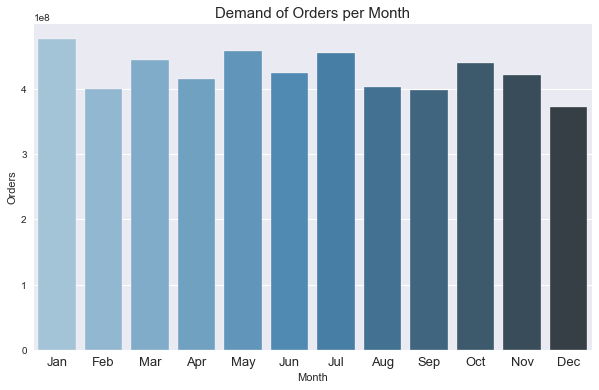

In [160]:
y=df.groupby("month")['Order_Demand'].sum()
y
x = y.index #the index(row labels) of the dataframe


plt.figure(figsize=(10,6)) # setting the plot figure size
ax = sns.barplot(x= x, y = y,  data = df, palette="Blues_d") # using the seaborn's barplot method
ax.set(xlabel = 'Month') 
ax.set(ylabel = 'Orders') 
ax.set_title('Demand of Orders per Month', fontsize=15)
ax.set_xticklabels(('Jan','Feb',"Mar",'Apr',"May",'Jun','Jul','Aug','Sep','Oct','Nov','Dec'), rotation='horizontal', fontsize=13)
plt.show() # displaying the plot

This figure shows that most of the orders made demand in the month of January

### How many number of Orders were demanded on different days?

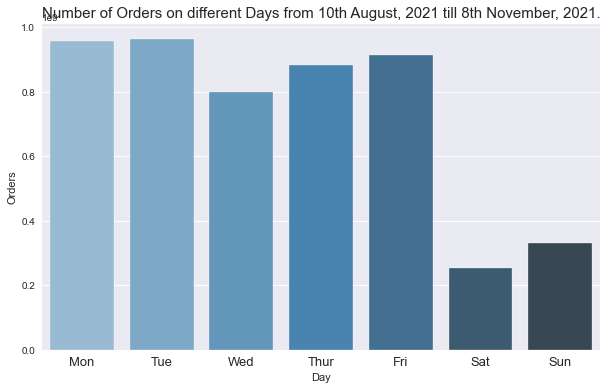

In [161]:
y=df.groupby("day")['Order_Demand'].sum()
y
x = y.index #the index(row labels) of the dataframe


plt.figure(figsize=(10,6)) # setting the plot figure size
ax = sns.barplot(x= x, y = y,  data = df, palette="Blues_d") # using the seaborn's barplot method
ax.set(xlabel = 'Day') 
ax.set(ylabel = 'Orders') 
ax.set_title('Number of Orders on different Days from 10th August, 2021 till 8th November, 2021.', fontsize=15)
ax.set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'), rotation='horizontal', fontsize=13)
plt.show() # displaying the plot

It can be seen that most of the orders were made on Monday and Tuesday

### How many number of Orders were demanded per month for warehouse Whse_A?


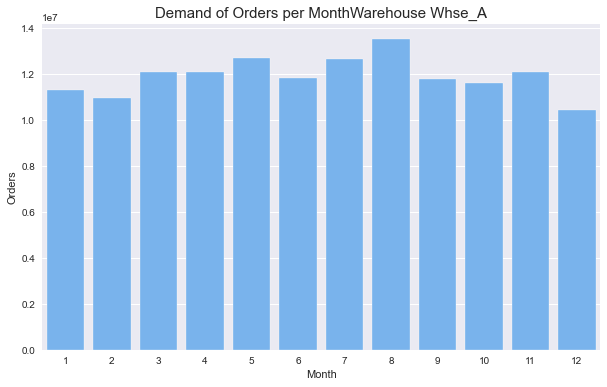

In [81]:
y=dfA.groupby("month")['Order_Demand'].sum()
y
x = y.index #the index(row labels) of the dataframe


plt.figure(figsize=(10,6)) # setting the plot figure size
ax = sns.barplot(x= x, y = y,  data = df, color = '#66b3ff') # using the seaborn's barplot method
ax.set(xlabel = 'Month') 
ax.set(ylabel = 'Orders') 
ax.set_title('Demand of Orders per MonthWarehouse Whse_A', fontsize=15)
plt.show() # displaying the plot

Most of the orders made from warehouse Whse_A were in the month of August

### How many number of Orders were demanded per month for warehouse Whse_C?


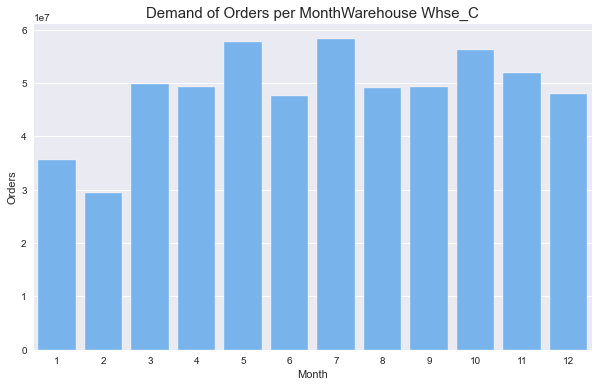

In [82]:
y=dfC.groupby("month")['Order_Demand'].sum()
y
x = y.index #the index(row labels) of the dataframe


plt.figure(figsize=(10,6)) # setting the plot figure size
ax = sns.barplot(x= x, y = y,  data = df, color = '#66b3ff') # using the seaborn's barplot method
ax.set(xlabel = 'Month') 
ax.set(ylabel = 'Orders') 
ax.set_title('Demand of Orders per MonthWarehouse Whse_C## How many number of Orders were made per month for warehouse Whse_A?
', fontsize=15)
plt.show() # displaying the plot

Most of the orders made from warehouse Whse_C were in the month of July

### How many number of Orders were demanded per month for warehouse Whse_J?


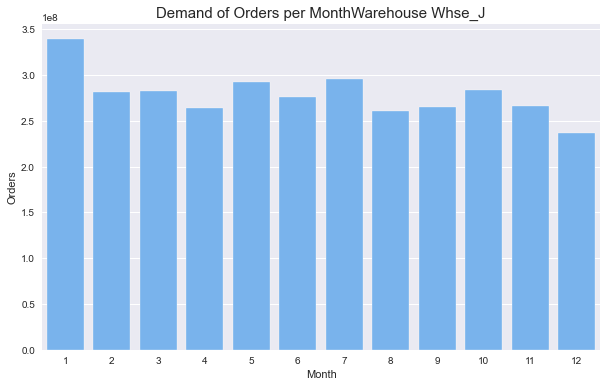

In [83]:
y=dfJ.groupby("month")['Order_Demand'].sum()
y
x = y.index #the index(row labels) of the dataframe


plt.figure(figsize=(10,6)) # setting the plot figure size
ax = sns.barplot(x= x, y = y,  data = df, color = '#66b3ff') # using the seaborn's barplot method
ax.set(xlabel = 'Month') 
ax.set(ylabel = 'Orders') 
ax.set_title('Demand of Orders per MonthWarehouse Whse_J', fontsize=15)
plt.show() # displaying the plot

Most of the orders made from warehouse Whse_J were in the month of January

### How many number of Orders were demanded per month for warehouse Whse_S?


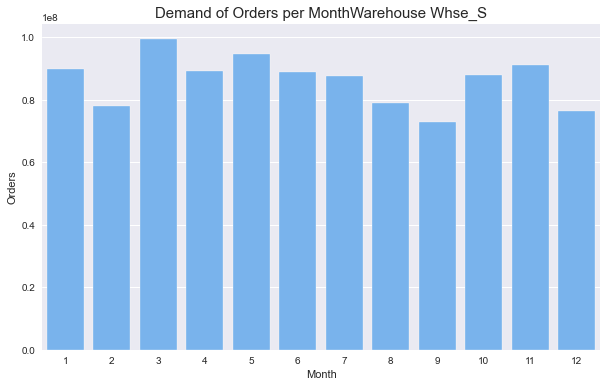

In [84]:
y=dfS.groupby("month")['Order_Demand'].sum()
y
x = y.index #the index(row labels) of the dataframe


plt.figure(figsize=(10,6)) # setting the plot figure size
ax = sns.barplot(x= x, y = y,  data = df, color = '#66b3ff') # using the seaborn's barplot method
ax.set(xlabel = 'Month') 
ax.set(ylabel = 'Orders') 
ax.set_title('Demand of Orders per MonthWarehouse Whse_S', fontsize=15)
plt.show() # displaying the plot

Most of the orders made from warehouse Whse_S were in the month of March

### Correlation Matrix

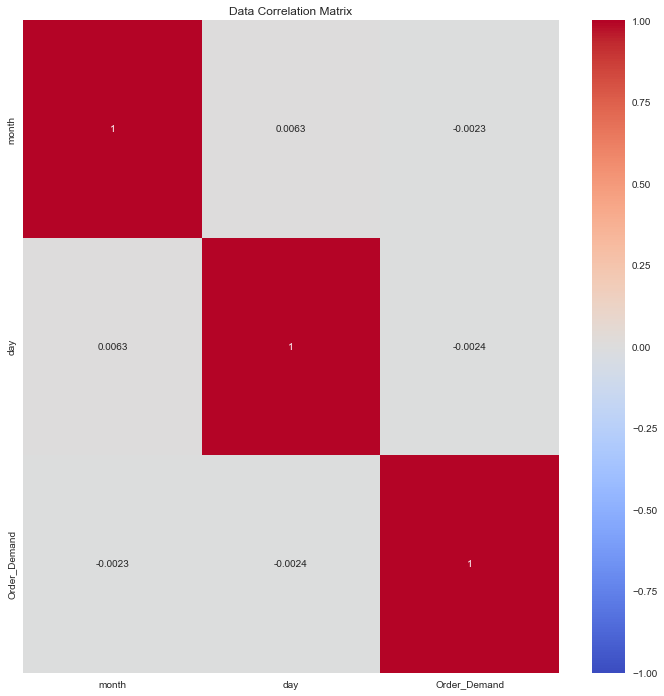

In [87]:
fig1 = plt.figure(figsize=(12,12));
df.corr()
plt.title('Data Correlation Matrix')
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = 'coolwarm', annot=True);

### From which year did the total orders fall/rise overall?


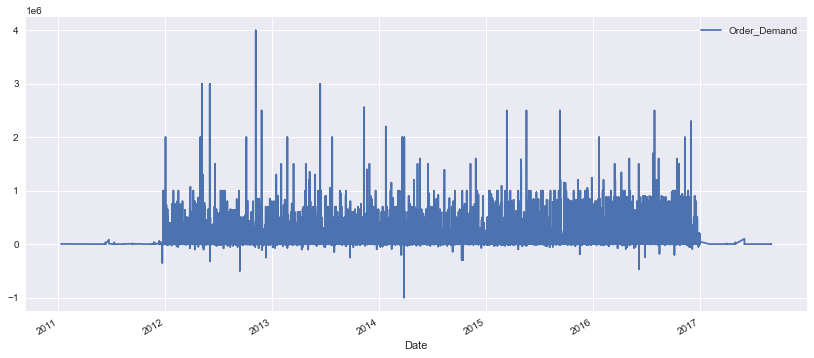

In [91]:
plt.figure(figsize=(14,6)) # setting the plot figure size
ax = plt.gca()
df.plot( x='Date' , y='Order_Demand' ,ax=ax);


This figure tells us that starting from year 2014, the numbers of orders fell

### From which year did the total orders fall/rise overall for each warehouse?


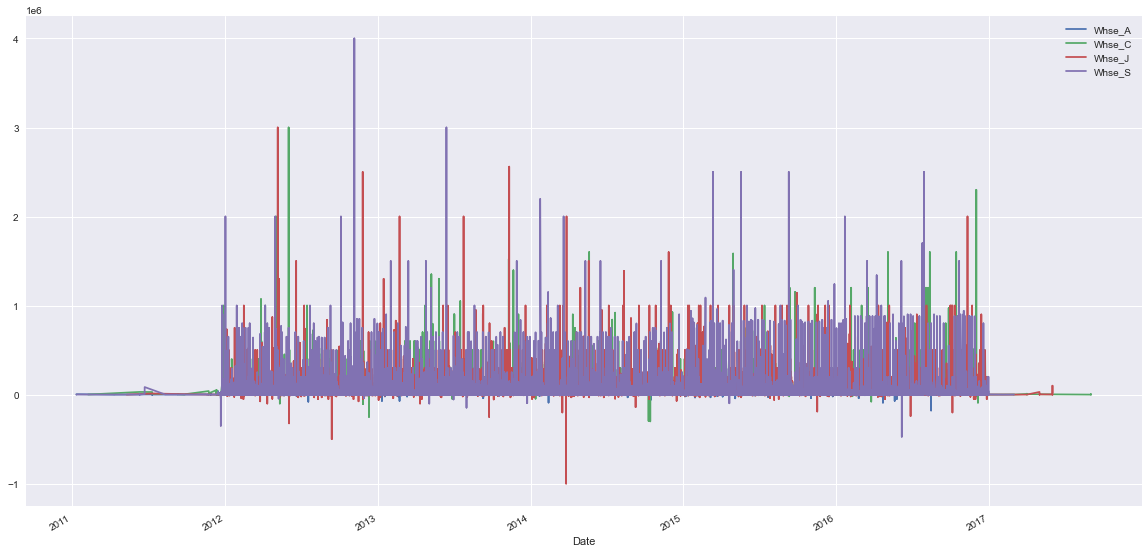

In [95]:

plt.figure(figsize=(20,10)) # setting the plot figure size
ax = plt.gca()
dfA.plot( x='Date' , y='Order_Demand',ax=ax ,label='Whse_A');
dfC.plot( x='Date' , y='Order_Demand',ax=ax,label='Whse_C' );
dfJ.plot( x='Date' , y='Order_Demand',ax=ax,label='Whse_J' );
dfS.plot( x='Date' , y='Order_Demand',ax=ax,label='Whse_S' );


This timeseries shows that the orders from Whse_J fell to negative in around the year 2014-2015 

# Forecasting daily demand of orders for the next week for two warehouses i.e Whse_A and Whse_C

Using Machine Learning algorithm __ARIMA__ to forecast the demand of orders for the next week.

#### ARIMA: 
An autoregressive integrated moving average, or ARIMA, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. 

#### How does ARIMA forecasting work?
ARIMA forecasting is achieved by plugging in time series data for the variable of interest. Statistical software will identify the appropriate number of lags or amount of differencing to be applied to the data and check for stationarity. It will then output the results, which are often interpreted similarly to that of a multiple linear regression model.

#### Why ARIMA? 
The main advantage of ARIMA forecasting is that it requires data on the time series in question only. First, this feature is advantageous if one is forecasting a large number of time series. Second, this avoids a problem that occurs sometimes with multivariate models.

In [97]:

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm


In [142]:
# using arima model to fit the data
model1 = ARIMA(dfA['Order_Demand'],order=(1,1,1))
model1_fit = model1.fit()
model1_fit.summary()




C:\Users\Tabish Q. Nayeemi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tabish Q. Nayeemi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tabish Q. Nayeemi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Order_Demand   No. Observations:               115191
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -1125786.246
Date:                Fri, 29 Apr 2022   AIC                        2251578.491
Time:                        15:42:39   BIC                        2251607.454
Sample:                             0   HQIC                       2251587.225
                             - 115191                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0995      0.000    297.255      0.000       0.099       0.100
ma.L1         -0.8767      0.000  -5313.017      0.000      -0.877      -0.876
sigma2      1.978e+07   7.16e-12   2.76e+18      0.000    1.98e+07    1.98e+07
===================================================================================
Ljung-Box (L1) (Q):                   5.67   Jarque-Bera (JB):        1306821520.78
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.92   Skew:                            10.62
Prob(H) (two-sided):                  0.00   Kurtosis:                       524.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.2e+31. Standard errors may be unstable.
"""

In [143]:
# Assuming indepenence because EW1 and EW2 are seemingly independent
model2 = ARIMA(dfC['Order_Demand'],order=(2,0,5))
model2_fit = model2.fit()
model2_fit.summary()


C:\Users\Tabish Q. Nayeemi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tabish Q. Nayeemi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tabish Q. Nayeemi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Order_Demand   No. Observations:                37868
Model:                 ARIMA(2, 0, 5)   Log Likelihood             -465262.905
Date:                Fri, 29 Apr 2022   AIC                         930543.810
Time:                        15:43:01   BIC                         930620.687
Sample:                             0   HQIC                        930568.207
                              - 37868                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.536e+04   1476.326     10.407      0.000    1.25e+04    1.83e+04
ar.L1          0.3067      0.203      1.509      0.131      -0.092       0.705
ar.L2          0.5983      0.191      3.135      0.002       0.224       0.972
ma.L1          0.0575      0.203      0.283      0.777      -0.341       0.456
ma.L2         -0.4999      0.117     -4.276      0.000      -0.729      -0.271
ma.L3         -0.0759      0.027     -2.821      0.005      -0.129      -0.023
ma.L4         -0.0324      0.002    -15.742      0.000      -0.036      -0.028
ma.L5         -0.0301      0.008     -3.934      0.000      -0.045      -0.015
sigma2      2.756e+09      0.913   3.02e+09      0.000    2.76e+09    2.76e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         280438555.94
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            12.78
Prob(H) (two-sided):                  0.00   Kurtosis:                       423.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.74e+22. Standard errors may be unstable.
"""

_predicting for only warehouse A and C for now_

In [157]:

model3 = ARIMA(dfJ['Order_Demand'],order=(2,0,5))
model3_fit = model3.fit()
model3_fit.summary()



C:\Users\Tabish Q. Nayeemi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tabish Q. Nayeemi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tabish Q. Nayeemi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tabish Q. Nayeemi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starti

KeyboardInterrupt: 

In [ ]:
model4 = ARIMA(dfS['Order_Demand'],order=(2,0,5))
model4_fit = model4.fit()
model4_fit.summary()

In [144]:
# predicting the data
ew1 = model1_fit.predict(start=92,end=98)
ew2 = model2_fit.predict(start=147,end=153)
ew1.astype(int),ew2.astype(int),

(41125    599
 41126    545
 41127    513
 41128    470
 41129    414
 41130    465
 41131    413
 Name: predicted_mean, dtype: int32,
 2493     9224
 2494     9498
 2495    11986
 2496    14268
 2497    24443
 2498    16267
 2499    24209
 Name: predicted_mean, dtype: int32)

C:\Users\TABISH~1.NAY\AppData\Local\Temp/ipykernel_4944/1294840918.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'), rotation='horizontal', fontsize=13);


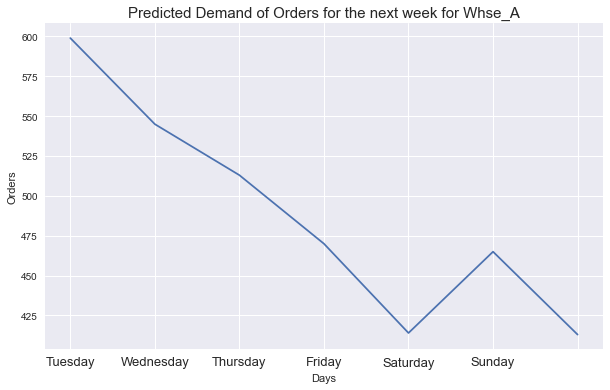

In [158]:
y=ew1.astype(int)
y
x = y.index #the index(row labels) of the dataframe


plt.figure(figsize=(10,6)) # setting the plot figure size
ax = sns.lineplot(x= x, y = y,  data = ew1, palette="Blues_d") # using the seaborn's lineplot method
ax.set(xlabel = 'Days') 
ax.set(ylabel = 'Orders') 
ax.set_title('Predicted Demand of Orders for the next week for Whse_A', fontsize=15)
ax.set_xticklabels(('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'), rotation='horizontal', fontsize=13);
plt.show() # displaying the plot

C:\Users\TABISH~1.NAY\AppData\Local\Temp/ipykernel_4944/368081380.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'), rotation='horizontal', fontsize=13)


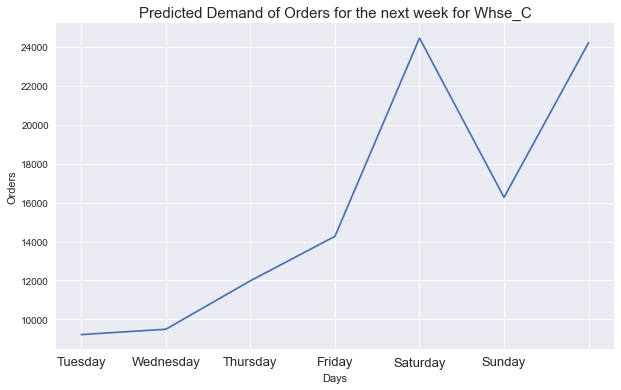

In [159]:
y=ew2.astype(int)
y
x = y.index #the index(row labels) of the dataframe


plt.figure(figsize=(10,6)) # setting the plot figure size
ax = sns.lineplot(x= x, y = y,  data = ew2, palette="Blues_d") # using the seaborn's lineplot method
ax.set(xlabel = 'Days') 
ax.set(ylabel = 'Orders') 
ax.set_title('Predicted Demand of Orders for the next week for Whse_C', fontsize=15)
ax.set_xticklabels(('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'), rotation='horizontal', fontsize=13)
plt.show() # displaying the plot

The demand or orders are dropping for the next week for warehouse A, so we should take actions to stop this. On the other hand, the demand will increase for warehouse C and for that, we should keep our supply ready and update the warehouse storage accordingly